In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data length: {0}".format(len(hasy_train.data)))
print("Test data length: {0}".format(len(hasy_test.data)))
print("Img Shape: {0}".format(hasy_train.data[0].shape))
print("Number of Labels: {0}".format(hasy_train.no_labels))

100%|██████████| 16992/16992 [00:00<00:00, 72307.15it/s] 

Train data length: 5690
Test data length: 644
Img Shape: torch.Size([1, 28, 28])
Number of Labels: 15


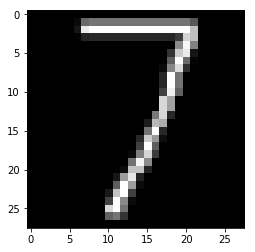

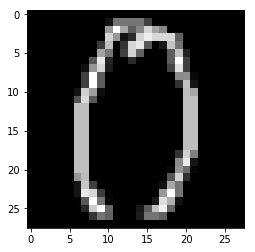

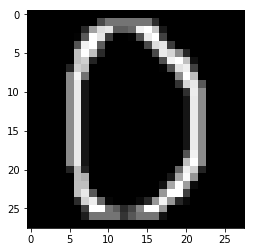

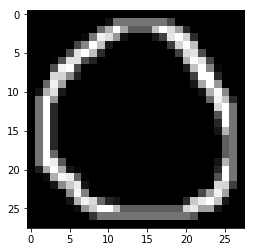

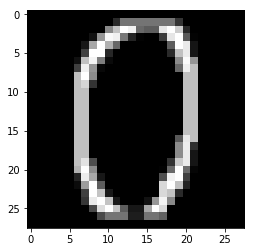

In [2]:
from torchvision import transforms
for i in range(5):
    test_img = transforms.ToPILImage()(hasy_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()

In [3]:
# Train with a pretrained model from PyTorch
from torchvision import models
from torch.nn import Conv2d

pretrained = False
torch_model = models.densenet201(num_classes=15)
torch_model.features.conv0 = Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
if pretrained:
    torch_model.load_state_dict(torch.load('pretrained-model-01.ckpt'))
epochs = 55
optimizer = torch.optim.Adam(torch_model.parameters(), lr=0.001, betas=(0.8, 0.925), weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

def calc_accuracy(model):
    accuracies = []
    for idx, [x_test, y_test] in enumerate(test_loader):
        test_pred = model(x_test)
        accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
        accuracies.append(accuracy)
    return np.mean(accuracies)

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = torch_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 50 == 0:
                print('Loss: {}'.format(loss))
                acc = calc_accuracy(torch_model)       
                print("Accuracy: {0}".format(acc)) 
                if acc > 80:
                    torch.save(torch_model.state_dict(), 'model_acc_{0}.ckpt'.format(acc))

  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 0
Loss: 2.7665889263153076


  0%|          | 1/356 [00:12<1:15:29, 12.76s/it]

Accuracy: 48.17073059082031


 14%|█▍        | 50/356 [01:27<06:32,  1.28s/it] 

Loss: 1.348706603050232


 14%|█▍        | 51/356 [01:46<34:04,  6.70s/it]

Accuracy: 45.88414764404297


 28%|██▊       | 100/356 [02:54<06:03,  1.42s/it]

Loss: 0.9000043869018555


 28%|██▊       | 101/356 [03:13<28:30,  6.71s/it]

Accuracy: 46.49390411376953


 42%|████▏     | 150/356 [04:24<04:57,  1.44s/it]

Loss: 1.0524007081985474


 42%|████▏     | 151/356 [04:43<22:56,  6.71s/it]

Accuracy: 41.31097412109375


 56%|█████▌    | 200/356 [05:58<04:07,  1.59s/it]

Loss: 0.5621466636657715


 56%|█████▋    | 201/356 [06:20<19:28,  7.54s/it]

Accuracy: 43.29268264770508


 70%|███████   | 250/356 [07:36<02:41,  1.53s/it]

Loss: 0.7453612685203552


 71%|███████   | 251/356 [07:56<12:28,  7.13s/it]

Accuracy: 47.25609588623047


 84%|████████▍ | 300/356 [09:12<01:23,  1.50s/it]

Loss: 0.6279917359352112


 85%|████████▍ | 301/356 [09:34<07:08,  7.79s/it]

Accuracy: 43.44512176513672


 98%|█████████▊| 350/356 [11:11<00:10,  1.70s/it]

Loss: 0.5150227546691895


 99%|█████████▊| 351/356 [11:32<00:37,  7.55s/it]

Accuracy: 40.85365676879883


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 1
Loss: 0.7551416754722595


  0%|          | 1/356 [00:20<2:01:12, 20.49s/it]

Accuracy: 42.07316970825195


 14%|█▍        | 50/356 [01:35<07:34,  1.49s/it] 

Loss: 0.7647292613983154


 14%|█▍        | 51/356 [01:55<35:11,  6.92s/it]

Accuracy: 46.79878234863281


 28%|██▊       | 100/356 [03:16<06:14,  1.46s/it]

Loss: 0.5705273151397705


 28%|██▊       | 101/356 [03:43<38:56,  9.16s/it]

Accuracy: 53.65853500366211


 42%|████▏     | 150/356 [05:10<05:47,  1.69s/it]

Loss: 0.5776360034942627


 42%|████▏     | 151/356 [05:36<31:01,  9.08s/it]

Accuracy: 51.219512939453125


 56%|█████▌    | 200/356 [06:52<03:51,  1.49s/it]

Loss: 0.6572507619857788


 56%|█████▋    | 201/356 [07:13<18:51,  7.30s/it]

Accuracy: 50.914634704589844


 70%|███████   | 250/356 [08:30<02:43,  1.54s/it]

Loss: 0.5922450423240662


 71%|███████   | 251/356 [08:50<12:30,  7.14s/it]

Accuracy: 44.817073822021484


 84%|████████▍ | 300/356 [10:08<01:37,  1.74s/it]

Loss: 1.2700092792510986


 85%|████████▍ | 301/356 [10:34<08:14,  8.98s/it]

Accuracy: 41.92073059082031


 98%|█████████▊| 350/356 [12:12<00:11,  1.94s/it]

Loss: 0.49210846424102783


 99%|█████████▊| 351/356 [12:37<00:45,  9.01s/it]

Accuracy: 49.54268264770508


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 2
Loss: 0.9807875156402588


  0%|          | 1/356 [00:23<2:16:31, 23.08s/it]

Accuracy: 42.225608825683594


 14%|█▍        | 50/356 [01:43<07:53,  1.55s/it] 

Loss: 0.39398783445358276


 14%|█▍        | 51/356 [02:04<36:43,  7.23s/it]

Accuracy: 48.32316970825195


 28%|██▊       | 100/356 [03:30<09:59,  2.34s/it]

Loss: 1.0108451843261719


 28%|██▊       | 101/356 [04:02<47:07, 11.09s/it]

Accuracy: 43.90243911743164


 42%|████▏     | 150/356 [05:44<07:13,  2.11s/it]

Loss: 0.3882327973842621


 42%|████▏     | 151/356 [06:08<30:14,  8.85s/it]

Accuracy: 47.10365676879883


 56%|█████▌    | 200/356 [07:25<04:01,  1.55s/it]

Loss: 0.7129077911376953


 56%|█████▋    | 201/356 [07:45<18:07,  7.02s/it]

Accuracy: 48.475608825683594


 70%|███████   | 250/356 [09:03<02:47,  1.58s/it]

Loss: 0.515190601348877


 71%|███████   | 251/356 [09:24<12:45,  7.29s/it]

Accuracy: 45.274391174316406


 84%|████████▍ | 300/356 [10:42<01:32,  1.66s/it]

Loss: 0.8914127945899963


 85%|████████▍ | 301/356 [11:03<06:56,  7.57s/it]

Accuracy: 48.932926177978516


 98%|█████████▊| 350/356 [12:22<00:08,  1.46s/it]

Loss: 0.7993485927581787


 99%|█████████▊| 351/356 [12:42<00:35,  7.06s/it]

Accuracy: 48.01829147338867


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 3
Loss: 0.7688387036323547


  0%|          | 1/356 [00:19<1:56:39, 19.72s/it]

Accuracy: 45.42683029174805


 14%|█▍        | 50/356 [01:36<07:53,  1.55s/it] 

Loss: 0.3887028694152832


 14%|█▍        | 51/356 [01:57<36:23,  7.16s/it]

Accuracy: 43.75


 28%|██▊       | 100/356 [03:13<06:49,  1.60s/it]

Loss: 0.7742029428482056


 28%|██▊       | 101/356 [03:34<31:01,  7.30s/it]

Accuracy: 47.56097412109375


 42%|████▏     | 150/356 [04:57<06:01,  1.76s/it]

Loss: 0.6165724992752075


 42%|████▏     | 151/356 [05:17<24:22,  7.13s/it]

Accuracy: 45.88414764404297


 56%|█████▌    | 200/356 [06:34<04:08,  1.59s/it]

Loss: 1.0792444944381714


 56%|█████▋    | 201/356 [06:54<18:36,  7.20s/it]

Accuracy: 44.969512939453125


 70%|███████   | 250/356 [08:10<02:44,  1.55s/it]

Loss: 0.3310254216194153


 71%|███████   | 251/356 [08:30<12:11,  6.97s/it]

Accuracy: 50.60975646972656


 84%|████████▍ | 300/356 [09:46<01:26,  1.54s/it]

Loss: 0.4373204708099365


 85%|████████▍ | 301/356 [10:06<06:35,  7.19s/it]

Accuracy: 44.664634704589844


 98%|█████████▊| 350/356 [11:22<00:09,  1.53s/it]

Loss: 0.8582534193992615


 99%|█████████▊| 351/356 [11:42<00:36,  7.23s/it]

Accuracy: 47.86585235595703


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 4
Loss: 0.3435414433479309


  0%|          | 1/356 [00:19<1:57:49, 19.91s/it]

Accuracy: 44.969512939453125


 14%|█▍        | 50/356 [02:02<13:33,  2.66s/it] 

Loss: 0.588066816329956


 14%|█▍        | 51/356 [02:25<43:12,  8.50s/it]

Accuracy: 45.88414764404297


 28%|██▊       | 100/356 [03:51<07:16,  1.71s/it]

Loss: 0.5653113126754761


 28%|██▊       | 101/356 [04:13<33:06,  7.79s/it]

Accuracy: 47.25609588623047


 42%|████▏     | 150/356 [05:33<05:46,  1.68s/it]

Loss: 0.7337199449539185


 42%|████▏     | 151/356 [05:53<24:43,  7.24s/it]

Accuracy: 48.780487060546875


 56%|█████▌    | 200/356 [07:09<04:10,  1.61s/it]

Loss: 0.7104640007019043


 56%|█████▋    | 201/356 [07:34<22:50,  8.84s/it]

Accuracy: 48.32316970825195


 70%|███████   | 250/356 [08:56<02:49,  1.60s/it]

Loss: 0.4557974636554718


 71%|███████   | 251/356 [09:16<12:27,  7.12s/it]

Accuracy: 44.5121955871582


 84%|████████▍ | 300/356 [10:32<01:26,  1.54s/it]

Loss: 0.6389212012290955


 85%|████████▍ | 301/356 [10:52<06:37,  7.23s/it]

Accuracy: 45.73170852661133


 98%|█████████▊| 350/356 [12:10<00:09,  1.60s/it]

Loss: 0.3926107585430145


 99%|█████████▊| 351/356 [12:30<00:36,  7.27s/it]

Accuracy: 48.17073059082031


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 5
Loss: 0.3282838463783264


  0%|          | 1/356 [00:20<2:03:43, 20.91s/it]

Accuracy: 43.44512176513672


 14%|█▍        | 50/356 [01:36<07:58,  1.56s/it] 

Loss: 0.32994306087493896


 14%|█▍        | 51/356 [01:57<37:51,  7.45s/it]

Accuracy: 44.20731735229492


 28%|██▊       | 100/356 [03:15<06:50,  1.60s/it]

Loss: 0.4943999946117401


 28%|██▊       | 101/356 [03:35<31:01,  7.30s/it]

Accuracy: 48.475608825683594


 42%|████▏     | 150/356 [04:53<05:46,  1.68s/it]

Loss: 0.4272443950176239


 42%|████▏     | 151/356 [05:13<25:12,  7.38s/it]

Accuracy: 48.475608825683594


 56%|█████▌    | 200/356 [06:30<04:15,  1.64s/it]

Loss: 0.45655137300491333


 56%|█████▋    | 201/356 [06:51<18:35,  7.20s/it]

Accuracy: 48.17073059082031


 70%|███████   | 250/356 [08:04<02:48,  1.59s/it]

Loss: 0.3563779592514038


 71%|███████   | 251/356 [08:25<12:32,  7.17s/it]

Accuracy: 46.95121765136719


 84%|████████▍ | 300/356 [09:37<01:21,  1.45s/it]

Loss: 0.43940067291259766


 85%|████████▍ | 301/356 [09:55<05:45,  6.29s/it]

Accuracy: 48.01829147338867


 98%|█████████▊| 350/356 [11:03<00:08,  1.41s/it]

Loss: 0.5026940703392029


 99%|█████████▊| 351/356 [11:21<00:32,  6.52s/it]

Accuracy: 51.219512939453125


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 6
Loss: 0.32472971081733704


  0%|          | 1/356 [00:17<1:41:44, 17.19s/it]

Accuracy: 52.28658676147461


 14%|█▍        | 50/356 [01:25<07:08,  1.40s/it] 

Loss: 0.16696985065937042


 14%|█▍        | 51/356 [01:43<31:18,  6.16s/it]

Accuracy: 45.57926940917969


 28%|██▊       | 100/356 [02:48<05:45,  1.35s/it]

Loss: 0.6141985654830933


 28%|██▊       | 101/356 [03:06<26:06,  6.14s/it]

Accuracy: 45.88414764404297


 42%|████▏     | 150/356 [04:12<04:24,  1.28s/it]

Loss: 0.29117706418037415


 42%|████▏     | 151/356 [04:30<21:46,  6.37s/it]

Accuracy: 48.780487060546875


 56%|█████▌    | 200/356 [05:38<03:35,  1.38s/it]

Loss: 0.1768016815185547


 56%|█████▋    | 201/356 [05:57<16:48,  6.51s/it]

Accuracy: 49.39024353027344


 70%|███████   | 250/356 [07:03<02:26,  1.39s/it]

Loss: 0.44458523392677307


 71%|███████   | 251/356 [07:21<10:52,  6.22s/it]

Accuracy: 51.67683029174805


 84%|████████▍ | 300/356 [08:27<01:17,  1.38s/it]

Loss: 0.5653647184371948


 85%|████████▍ | 301/356 [08:45<05:43,  6.25s/it]

Accuracy: 49.085365295410156


 98%|█████████▊| 350/356 [09:53<00:08,  1.39s/it]

Loss: 0.5146846771240234


 99%|█████████▊| 351/356 [10:10<00:30,  6.16s/it]

Accuracy: 52.89634323120117


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 7
Loss: 0.4214293658733368


  0%|          | 1/356 [00:17<1:43:10, 17.44s/it]

Accuracy: 49.69512176513672


 14%|█▍        | 50/356 [01:25<07:06,  1.39s/it] 

Loss: 0.1837608367204666


 14%|█▍        | 51/356 [01:43<31:57,  6.29s/it]

Accuracy: 49.2378044128418


 28%|██▊       | 100/356 [02:52<06:03,  1.42s/it]

Loss: 0.3598408102989197


 28%|██▊       | 101/356 [03:09<26:23,  6.21s/it]

Accuracy: 46.79878234863281


 42%|████▏     | 150/356 [04:15<04:48,  1.40s/it]

Loss: 0.34682372212409973


 42%|████▏     | 151/356 [04:33<21:41,  6.35s/it]

Accuracy: 49.69512176513672


 56%|█████▌    | 200/356 [05:39<03:26,  1.33s/it]

Loss: 0.4140332341194153


 56%|█████▋    | 201/356 [05:57<15:53,  6.15s/it]

Accuracy: 49.39024353027344


 70%|███████   | 250/356 [07:04<02:22,  1.34s/it]

Loss: 0.6254562139511108


 71%|███████   | 251/356 [07:21<10:46,  6.16s/it]

Accuracy: 47.86585235595703


 84%|████████▍ | 300/356 [08:29<01:18,  1.39s/it]

Loss: 0.2733795642852783


 85%|████████▍ | 301/356 [08:46<05:42,  6.23s/it]

Accuracy: 48.17073059082031


 98%|█████████▊| 350/356 [09:52<00:08,  1.39s/it]

Loss: 0.3407436013221741


 99%|█████████▊| 351/356 [10:10<00:31,  6.35s/it]

Accuracy: 48.628047943115234


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 8
Loss: 0.8805161714553833


  0%|          | 1/356 [00:18<1:48:15, 18.30s/it]

Accuracy: 49.69512176513672


 14%|█▍        | 50/356 [01:25<06:51,  1.34s/it] 

Loss: 0.2484886646270752


 14%|█▍        | 51/356 [01:44<32:45,  6.44s/it]

Accuracy: 52.13414764404297


 28%|██▊       | 100/356 [02:51<05:39,  1.33s/it]

Loss: 0.3934415578842163


 28%|██▊       | 101/356 [03:09<26:05,  6.14s/it]

Accuracy: 50.45731735229492


 42%|████▏     | 150/356 [04:16<04:38,  1.35s/it]

Loss: 0.3749973177909851


 42%|████▏     | 151/356 [04:34<20:53,  6.12s/it]

Accuracy: 49.54268264770508


 56%|█████▌    | 200/356 [05:41<03:33,  1.37s/it]

Loss: 0.4735293984413147


 56%|█████▋    | 201/356 [05:58<16:10,  6.26s/it]

Accuracy: 49.84756088256836


 70%|███████   | 250/356 [07:07<02:29,  1.41s/it]

Loss: 0.5043424963951111


 71%|███████   | 251/356 [07:25<11:12,  6.41s/it]

Accuracy: 47.10365676879883


 84%|████████▍ | 300/356 [08:33<01:20,  1.44s/it]

Loss: 0.26285094022750854


 85%|████████▍ | 301/356 [08:50<05:41,  6.21s/it]

Accuracy: 47.56097412109375


 98%|█████████▊| 350/356 [09:58<00:07,  1.31s/it]

Loss: 0.4776685833930969


 99%|█████████▊| 351/356 [10:16<00:32,  6.47s/it]

Accuracy: 48.32316970825195


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 9
Loss: 0.23244252800941467


  0%|          | 1/356 [00:18<1:48:20, 18.31s/it]

Accuracy: 51.371952056884766


 14%|█▍        | 50/356 [01:25<06:58,  1.37s/it] 

Loss: 0.24247956275939941


 14%|█▍        | 51/356 [01:43<31:57,  6.29s/it]

Accuracy: 50.0


 28%|██▊       | 100/356 [02:51<05:57,  1.40s/it]

Loss: 0.4344373643398285


 28%|██▊       | 101/356 [03:09<26:57,  6.34s/it]

Accuracy: 46.64634323120117


 42%|████▏     | 150/356 [04:18<04:32,  1.32s/it]

Loss: 0.23940619826316833


 42%|████▏     | 151/356 [04:36<21:34,  6.32s/it]

Accuracy: 48.628047943115234


 56%|█████▌    | 200/356 [05:43<03:39,  1.41s/it]

Loss: 0.4066632390022278


 56%|█████▋    | 201/356 [06:01<16:47,  6.50s/it]

Accuracy: 46.95121765136719


 70%|███████   | 250/356 [07:08<02:30,  1.42s/it]

Loss: 0.5212695598602295


 71%|███████   | 251/356 [07:27<11:27,  6.55s/it]

Accuracy: 49.2378044128418


 84%|████████▍ | 300/356 [08:33<01:14,  1.33s/it]

Loss: 0.399593710899353


 85%|████████▍ | 301/356 [08:51<05:48,  6.34s/it]

Accuracy: 48.17073059082031


 98%|█████████▊| 350/356 [09:55<00:08,  1.36s/it]

Loss: 0.5121699571609497


 99%|█████████▊| 351/356 [10:13<00:31,  6.28s/it]

Accuracy: 49.54268264770508


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 10
Loss: 0.22535766661167145


  0%|          | 1/356 [00:17<1:42:36, 17.34s/it]

Accuracy: 51.82926940917969


 14%|█▍        | 50/356 [01:25<07:21,  1.44s/it] 

Loss: 0.26018548011779785


 14%|█▍        | 51/356 [01:44<32:39,  6.43s/it]

Accuracy: 52.59146499633789


 28%|██▊       | 100/356 [02:51<05:49,  1.36s/it]

Loss: 0.3185978829860687


 28%|██▊       | 101/356 [03:09<27:14,  6.41s/it]

Accuracy: 50.0


 42%|████▏     | 150/356 [04:16<04:43,  1.38s/it]

Loss: 0.7272651195526123


 42%|████▏     | 151/356 [04:34<22:07,  6.48s/it]

Accuracy: 52.13414764404297


 56%|█████▌    | 200/356 [05:43<03:31,  1.36s/it]

Loss: 0.41132277250289917


 56%|█████▋    | 201/356 [06:00<15:49,  6.13s/it]

Accuracy: 49.085365295410156


 70%|███████   | 250/356 [07:07<02:29,  1.41s/it]

Loss: 0.2541921138763428


 71%|███████   | 251/356 [07:25<11:20,  6.48s/it]

Accuracy: 48.475608825683594


 84%|████████▍ | 300/356 [08:32<01:13,  1.30s/it]

Loss: 0.2640845775604248


 85%|████████▍ | 301/356 [08:49<05:33,  6.06s/it]

Accuracy: 48.17073059082031


 98%|█████████▊| 350/356 [09:58<00:08,  1.45s/it]

Loss: 0.21366935968399048


 99%|█████████▊| 351/356 [10:16<00:31,  6.35s/it]

Accuracy: 48.932926177978516


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 11
Loss: 0.17895829677581787


  0%|          | 1/356 [00:17<1:44:02, 17.58s/it]

Accuracy: 48.780487060546875


 14%|█▍        | 50/356 [01:25<07:03,  1.38s/it] 

Loss: 0.25475040078163147


 14%|█▍        | 51/356 [01:43<31:59,  6.29s/it]

Accuracy: 50.7621955871582


 28%|██▊       | 100/356 [02:51<06:02,  1.42s/it]

Loss: 0.23659849166870117


 28%|██▊       | 101/356 [03:09<27:07,  6.38s/it]

Accuracy: 50.15243911743164


 42%|████▏     | 150/356 [04:17<04:44,  1.38s/it]

Loss: 0.34417450428009033


 42%|████▏     | 151/356 [04:35<21:20,  6.25s/it]

Accuracy: 49.2378044128418


 56%|█████▌    | 200/356 [05:42<03:34,  1.38s/it]

Loss: 0.1601933091878891


 56%|█████▋    | 201/356 [05:59<15:59,  6.19s/it]

Accuracy: 49.085365295410156


 70%|███████   | 250/356 [07:07<02:34,  1.46s/it]

Loss: 0.25681304931640625


 71%|███████   | 251/356 [07:25<11:24,  6.52s/it]

Accuracy: 50.914634704589844


 84%|████████▍ | 300/356 [08:32<01:16,  1.37s/it]

Loss: 0.3867005407810211


 85%|████████▍ | 301/356 [08:49<05:42,  6.22s/it]

Accuracy: 48.32316970825195


 98%|█████████▊| 350/356 [09:56<00:08,  1.37s/it]

Loss: 0.1809406578540802


 99%|█████████▊| 351/356 [10:14<00:31,  6.35s/it]

Accuracy: 50.45731735229492


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 12
Loss: 0.14389686286449432


  0%|          | 1/356 [00:17<1:43:56, 17.57s/it]

Accuracy: 48.17073059082031


 14%|█▍        | 50/356 [01:25<06:55,  1.36s/it] 

Loss: 0.32717615365982056


 14%|█▍        | 51/356 [01:43<32:36,  6.41s/it]

Accuracy: 47.86585235595703


 28%|██▊       | 100/356 [02:49<05:31,  1.30s/it]

Loss: 0.37781253457069397


 28%|██▊       | 101/356 [03:06<25:53,  6.09s/it]

Accuracy: 51.219512939453125


 42%|████▏     | 150/356 [04:13<04:46,  1.39s/it]

Loss: 0.5800528526306152


 42%|████▏     | 151/356 [04:31<21:10,  6.20s/it]

Accuracy: 51.067073822021484


 56%|█████▌    | 200/356 [05:38<03:41,  1.42s/it]

Loss: 0.369275838136673


 56%|█████▋    | 201/356 [05:56<16:12,  6.27s/it]

Accuracy: 51.371952056884766


 70%|███████   | 250/356 [07:03<02:19,  1.31s/it]

Loss: 0.4146254062652588


 71%|███████   | 251/356 [07:21<10:51,  6.20s/it]

Accuracy: 50.30487823486328


 84%|████████▍ | 300/356 [08:27<01:18,  1.40s/it]

Loss: 0.3088378608226776


 85%|████████▍ | 301/356 [08:45<05:44,  6.26s/it]

Accuracy: 50.45731735229492


 98%|█████████▊| 350/356 [09:52<00:08,  1.36s/it]

Loss: 0.6082954406738281


 99%|█████████▊| 351/356 [10:10<00:31,  6.27s/it]

Accuracy: 50.7621955871582


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 13
Loss: 0.35868632793426514


  0%|          | 1/356 [00:17<1:43:07, 17.43s/it]

Accuracy: 48.17073059082031


 14%|█▍        | 50/356 [01:22<06:24,  1.26s/it] 

Loss: 0.19179049134254456


 14%|█▍        | 51/356 [01:39<30:37,  6.03s/it]

Accuracy: 49.54268264770508


 28%|██▊       | 100/356 [02:47<05:45,  1.35s/it]

Loss: 0.22334225475788116


 28%|██▊       | 101/356 [03:04<26:00,  6.12s/it]

Accuracy: 49.2378044128418


 42%|████▏     | 150/356 [04:10<04:42,  1.37s/it]

Loss: 0.6627745628356934


 42%|████▏     | 151/356 [04:28<21:19,  6.24s/it]

Accuracy: 49.085365295410156


 56%|█████▌    | 200/356 [05:36<03:40,  1.41s/it]

Loss: 0.5283749103546143


 56%|█████▋    | 201/356 [05:54<16:14,  6.28s/it]

Accuracy: 50.45731735229492


 70%|███████   | 250/356 [07:01<02:28,  1.40s/it]

Loss: 0.13459105789661407


 71%|███████   | 251/356 [07:18<10:49,  6.18s/it]

Accuracy: 52.74390411376953


 84%|████████▍ | 300/356 [08:25<01:20,  1.44s/it]

Loss: 0.12713363766670227


 85%|████████▍ | 301/356 [08:43<05:43,  6.24s/it]

Accuracy: 48.628047943115234


 98%|█████████▊| 350/356 [09:51<00:08,  1.35s/it]

Loss: 0.19137899577617645


 99%|█████████▊| 351/356 [10:08<00:31,  6.27s/it]

Accuracy: 51.371952056884766


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 14
Loss: 0.4235426187515259


  0%|          | 1/356 [00:17<1:44:51, 17.72s/it]

Accuracy: 48.475608825683594


 14%|█▍        | 50/356 [01:23<07:05,  1.39s/it] 

Loss: 0.13259491324424744


 14%|█▍        | 51/356 [01:40<32:07,  6.32s/it]

Accuracy: 48.475608825683594


 28%|██▊       | 100/356 [02:48<06:04,  1.42s/it]

Loss: 0.42042672634124756


 28%|██▊       | 101/356 [03:05<26:23,  6.21s/it]

Accuracy: 49.54268264770508


 42%|████▏     | 150/356 [04:12<04:55,  1.43s/it]

Loss: 0.27634871006011963


 42%|████▏     | 151/356 [04:30<21:29,  6.29s/it]

Accuracy: 50.45731735229492


 56%|█████▌    | 200/356 [05:37<03:34,  1.37s/it]

Loss: 0.5192000865936279


 56%|█████▋    | 201/356 [05:54<15:43,  6.08s/it]

Accuracy: 49.39024353027344


 70%|███████   | 250/356 [07:01<02:30,  1.42s/it]

Loss: 0.2452087551355362


 71%|███████   | 251/356 [07:19<10:54,  6.24s/it]

Accuracy: 52.43902587890625


 84%|████████▍ | 300/356 [08:26<01:11,  1.27s/it]

Loss: 0.22200354933738708


 85%|████████▍ | 301/356 [08:44<05:39,  6.17s/it]

Accuracy: 53.65853500366211


 98%|█████████▊| 350/356 [09:50<00:08,  1.36s/it]

Loss: 0.40528684854507446


 99%|█████████▊| 351/356 [10:08<00:31,  6.24s/it]

Accuracy: 50.914634704589844


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 15
Loss: 0.1150377094745636


  0%|          | 1/356 [00:18<1:46:53, 18.07s/it]

Accuracy: 52.74390411376953


 14%|█▍        | 50/356 [01:25<07:08,  1.40s/it] 

Loss: 0.18188586831092834


 14%|█▍        | 51/356 [01:43<31:22,  6.17s/it]

Accuracy: 50.15243911743164


 28%|██▊       | 100/356 [02:51<05:51,  1.37s/it]

Loss: 0.35386922955513


 28%|██▊       | 101/356 [03:08<26:06,  6.14s/it]

Accuracy: 50.30487823486328


 42%|████▏     | 150/356 [04:15<04:47,  1.40s/it]

Loss: 0.1990172415971756


 42%|████▏     | 151/356 [04:33<22:01,  6.45s/it]

Accuracy: 47.86585235595703


 56%|█████▌    | 200/356 [05:40<03:32,  1.36s/it]

Loss: 0.2598617672920227


 56%|█████▋    | 201/356 [05:58<16:11,  6.27s/it]

Accuracy: 49.69512176513672


 70%|███████   | 250/356 [07:04<02:16,  1.29s/it]

Loss: 0.4969797134399414


 71%|███████   | 251/356 [07:21<10:42,  6.12s/it]

Accuracy: 53.81097412109375


 84%|████████▍ | 300/356 [08:28<01:17,  1.38s/it]

Loss: 0.16736429929733276


 85%|████████▍ | 301/356 [08:46<05:52,  6.40s/it]

Accuracy: 50.60975646972656


 98%|█████████▊| 350/356 [09:54<00:08,  1.41s/it]

Loss: 0.21025756001472473


 99%|█████████▊| 351/356 [10:11<00:30,  6.18s/it]

Accuracy: 50.0


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 16
Loss: 0.7000905275344849


  0%|          | 1/356 [00:17<1:42:53, 17.39s/it]

Accuracy: 50.15243911743164


 14%|█▍        | 50/356 [01:23<06:34,  1.29s/it] 

Loss: 0.5763276815414429


 14%|█▍        | 51/356 [01:40<31:03,  6.11s/it]

Accuracy: 49.085365295410156


 28%|██▊       | 100/356 [02:47<05:46,  1.35s/it]

Loss: 0.24444185197353363


 28%|██▊       | 101/356 [03:04<26:16,  6.18s/it]

Accuracy: 48.628047943115234


 42%|████▏     | 150/356 [04:12<05:03,  1.47s/it]

Loss: 0.42167961597442627


 42%|████▏     | 151/356 [04:30<22:12,  6.50s/it]

Accuracy: 52.74390411376953


 56%|█████▌    | 200/356 [05:38<03:37,  1.40s/it]

Loss: 0.27422836422920227


 56%|█████▋    | 201/356 [05:56<16:41,  6.46s/it]

Accuracy: 51.067073822021484


 70%|███████   | 250/356 [07:03<02:28,  1.40s/it]

Loss: 0.31286823749542236


 71%|███████   | 251/356 [07:20<10:42,  6.12s/it]

Accuracy: 50.914634704589844


 84%|████████▍ | 300/356 [08:29<01:19,  1.41s/it]

Loss: 0.1945156753063202


 85%|████████▍ | 301/356 [08:46<05:44,  6.26s/it]

Accuracy: 50.60975646972656


 98%|█████████▊| 350/356 [09:54<00:08,  1.41s/it]

Loss: 0.2057817429304123


 99%|█████████▊| 351/356 [10:11<00:31,  6.22s/it]

Accuracy: 49.84756088256836


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 17
Loss: 0.29493266344070435


  0%|          | 1/356 [00:18<1:47:55, 18.24s/it]

Accuracy: 50.0


 14%|█▍        | 50/356 [01:25<07:07,  1.40s/it] 

Loss: 0.21172557771205902


 14%|█▍        | 51/356 [01:43<32:07,  6.32s/it]

Accuracy: 51.98170852661133


 28%|██▊       | 100/356 [02:51<05:58,  1.40s/it]

Loss: 0.10316319763660431


 28%|██▊       | 101/356 [03:09<27:08,  6.38s/it]

Accuracy: 50.914634704589844


 42%|████▏     | 150/356 [04:17<04:35,  1.34s/it]

Loss: 0.3694680631160736


 42%|████▏     | 151/356 [04:35<21:47,  6.38s/it]

Accuracy: 51.219512939453125


 56%|█████▌    | 200/356 [05:42<03:36,  1.39s/it]

Loss: 0.16461674869060516


 56%|█████▋    | 201/356 [06:00<15:58,  6.18s/it]

Accuracy: 50.60975646972656


 70%|███████   | 250/356 [07:07<02:20,  1.33s/it]

Loss: 0.45443880558013916


 71%|███████   | 251/356 [07:25<11:08,  6.37s/it]

Accuracy: 49.39024353027344


 84%|████████▍ | 300/356 [08:32<01:12,  1.30s/it]

Loss: 0.2097373902797699


 85%|████████▍ | 301/356 [08:50<05:32,  6.05s/it]

Accuracy: 50.914634704589844


 98%|█████████▊| 350/356 [09:57<00:08,  1.43s/it]

Loss: 0.28816351294517517


 99%|█████████▊| 351/356 [10:15<00:32,  6.48s/it]

Accuracy: 50.914634704589844


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 18
Loss: 0.170125350356102


  0%|          | 1/356 [00:17<1:42:13, 17.28s/it]

Accuracy: 49.085365295410156


 14%|█▍        | 50/356 [01:25<07:10,  1.41s/it] 

Loss: 0.2281951755285263


 14%|█▍        | 51/356 [01:43<32:10,  6.33s/it]

Accuracy: 50.914634704589844


 28%|██▊       | 100/356 [02:51<05:57,  1.40s/it]

Loss: 0.37049615383148193


 28%|██▊       | 101/356 [03:08<26:05,  6.14s/it]

Accuracy: 53.20121765136719


 42%|████▏     | 150/356 [04:13<04:37,  1.35s/it]

Loss: 0.13305294513702393


 42%|████▏     | 151/356 [04:31<21:24,  6.26s/it]

Accuracy: 51.98170852661133


 56%|█████▌    | 200/356 [05:37<03:27,  1.33s/it]

Loss: 0.43062877655029297


 56%|█████▋    | 201/356 [05:54<15:41,  6.08s/it]

Accuracy: 48.17073059082031


 70%|███████   | 250/356 [07:00<02:25,  1.37s/it]

Loss: 0.34890592098236084


 71%|███████   | 251/356 [07:18<11:08,  6.36s/it]

Accuracy: 52.59146499633789


 84%|████████▍ | 300/356 [08:27<01:17,  1.39s/it]

Loss: 0.256917268037796


 85%|████████▍ | 301/356 [08:44<05:41,  6.21s/it]

Accuracy: 50.914634704589844


 98%|█████████▊| 350/356 [09:52<00:08,  1.37s/it]

Loss: 0.26829782128334045


 99%|█████████▊| 351/356 [10:10<00:30,  6.14s/it]

Accuracy: 47.86585235595703


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 19
Loss: 0.15247221291065216


  0%|          | 1/356 [00:18<1:47:19, 18.14s/it]

Accuracy: 50.0


 14%|█▍        | 50/356 [01:24<06:32,  1.28s/it] 

Loss: 0.3014685809612274


 14%|█▍        | 51/356 [01:41<30:48,  6.06s/it]

Accuracy: 51.67683029174805


 28%|██▊       | 100/356 [02:44<05:21,  1.26s/it]

Loss: 0.21469759941101074


 28%|██▊       | 101/356 [03:01<26:02,  6.13s/it]

Accuracy: 51.067073822021484


 42%|████▏     | 150/356 [04:05<04:30,  1.31s/it]

Loss: 0.33277416229248047


 42%|████▏     | 151/356 [04:22<20:51,  6.10s/it]

Accuracy: 47.40853500366211


 56%|█████▌    | 200/356 [05:31<03:39,  1.41s/it]

Loss: 0.33128032088279724


 56%|█████▋    | 201/356 [05:49<16:46,  6.50s/it]

Accuracy: 46.49390411376953


 70%|███████   | 250/356 [06:57<02:28,  1.40s/it]

Loss: 0.09780672192573547


 71%|███████   | 251/356 [07:15<11:11,  6.39s/it]

Accuracy: 49.2378044128418


 84%|████████▍ | 300/356 [08:23<01:17,  1.38s/it]

Loss: 0.20321416854858398


 85%|████████▍ | 301/356 [08:40<05:41,  6.21s/it]

Accuracy: 50.15243911743164


 98%|█████████▊| 350/356 [09:48<00:08,  1.37s/it]

Loss: 0.25668492913246155


 99%|█████████▊| 351/356 [10:07<00:32,  6.43s/it]

Accuracy: 52.28658676147461


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 20
Loss: 0.09285299479961395


  0%|          | 1/356 [00:18<1:48:47, 18.39s/it]

Accuracy: 52.89634323120117


 14%|█▍        | 50/356 [01:25<06:45,  1.32s/it] 

Loss: 0.15993645787239075


 14%|█▍        | 51/356 [01:43<31:42,  6.24s/it]

Accuracy: 51.82926940917969


 28%|██▊       | 100/356 [02:51<05:57,  1.40s/it]

Loss: 0.3260309100151062


 28%|██▊       | 101/356 [03:09<26:46,  6.30s/it]

Accuracy: 50.15243911743164


 42%|████▏     | 150/356 [04:16<04:29,  1.31s/it]

Loss: 0.4526591897010803


 42%|████▏     | 151/356 [04:34<21:22,  6.25s/it]

Accuracy: 48.17073059082031


 56%|█████▌    | 200/356 [05:40<03:21,  1.29s/it]

Loss: 0.4953533709049225


 56%|█████▋    | 201/356 [05:58<15:57,  6.18s/it]

Accuracy: 49.085365295410156


 70%|███████   | 250/356 [07:05<02:27,  1.39s/it]

Loss: 0.25012511014938354


 71%|███████   | 251/356 [07:23<11:08,  6.37s/it]

Accuracy: 52.28658676147461


 84%|████████▍ | 300/356 [08:29<01:19,  1.42s/it]

Loss: 0.21466346085071564


 85%|████████▍ | 301/356 [08:47<05:57,  6.49s/it]

Accuracy: 50.7621955871582


 98%|█████████▊| 350/356 [09:55<00:08,  1.34s/it]

Loss: 0.3340998888015747


 99%|█████████▊| 351/356 [10:12<00:31,  6.22s/it]

Accuracy: 52.59146499633789


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 21
Loss: 0.2839941084384918


  0%|          | 1/356 [00:17<1:42:51, 17.38s/it]

Accuracy: 51.219512939453125


 14%|█▍        | 50/356 [01:25<06:47,  1.33s/it] 

Loss: 0.14752550423145294


 14%|█▍        | 51/356 [01:42<30:52,  6.07s/it]

Accuracy: 49.84756088256836


 28%|██▊       | 100/356 [02:49<06:04,  1.42s/it]

Loss: 0.44974809885025024


 28%|██▊       | 101/356 [03:06<26:41,  6.28s/it]

Accuracy: 50.30487823486328


 42%|████▏     | 150/356 [04:14<04:43,  1.38s/it]

Loss: 0.08510947227478027


 42%|████▏     | 151/356 [04:32<21:11,  6.20s/it]

Accuracy: 50.45731735229492


 56%|█████▌    | 200/356 [05:38<03:40,  1.41s/it]

Loss: 0.9025101661682129


 56%|█████▋    | 201/356 [05:56<16:08,  6.25s/it]

Accuracy: 52.13414764404297


 70%|███████   | 250/356 [07:04<02:25,  1.38s/it]

Loss: 0.3047156035900116


 71%|███████   | 251/356 [07:22<10:58,  6.27s/it]

Accuracy: 51.67683029174805


 84%|████████▍ | 300/356 [08:30<01:20,  1.44s/it]

Loss: 0.3741550147533417


 85%|████████▍ | 301/356 [08:47<05:42,  6.22s/it]

Accuracy: 51.371952056884766


 98%|█████████▊| 350/356 [09:55<00:08,  1.38s/it]

Loss: 0.6194185614585876


 99%|█████████▊| 351/356 [10:14<00:32,  6.53s/it]

Accuracy: 53.50609588623047


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 22
Loss: 0.28393492102622986


  0%|          | 1/356 [00:18<1:46:51, 18.06s/it]

Accuracy: 51.371952056884766


 14%|█▍        | 50/356 [01:26<06:46,  1.33s/it] 

Loss: 0.237481027841568


 14%|█▍        | 51/356 [01:43<31:10,  6.13s/it]

Accuracy: 50.914634704589844


 28%|██▊       | 100/356 [02:50<05:56,  1.39s/it]

Loss: 0.11892669647932053


 28%|██▊       | 101/356 [03:08<26:27,  6.23s/it]

Accuracy: 50.15243911743164


 42%|████▏     | 150/356 [04:16<04:50,  1.41s/it]

Loss: 0.17914119362831116


 42%|████▏     | 151/356 [04:34<21:41,  6.35s/it]

Accuracy: 47.71341323852539


 56%|█████▌    | 200/356 [05:42<03:35,  1.38s/it]

Loss: 0.3339753746986389


 56%|█████▋    | 201/356 [06:01<17:05,  6.61s/it]

Accuracy: 50.45731735229492


 70%|███████   | 250/356 [07:08<02:22,  1.34s/it]

Loss: 0.16644282639026642


 71%|███████   | 251/356 [07:25<10:44,  6.14s/it]

Accuracy: 48.932926177978516


 84%|████████▍ | 300/356 [08:33<01:16,  1.36s/it]

Loss: 0.29900750517845154


 85%|████████▍ | 301/356 [08:50<05:37,  6.14s/it]

Accuracy: 49.39024353027344


 98%|█████████▊| 350/356 [09:59<00:08,  1.37s/it]

Loss: 0.5423747301101685


 99%|█████████▊| 351/356 [10:17<00:31,  6.36s/it]

Accuracy: 47.56097412109375


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 23
Loss: 0.15713012218475342


  0%|          | 1/356 [00:17<1:45:26, 17.82s/it]

Accuracy: 48.780487060546875


 14%|█▍        | 50/356 [01:24<07:02,  1.38s/it] 

Loss: 0.20946180820465088


 14%|█▍        | 51/356 [01:42<31:33,  6.21s/it]

Accuracy: 50.15243911743164


 28%|██▊       | 100/356 [02:49<05:55,  1.39s/it]

Loss: 0.18100705742835999


 28%|██▊       | 101/356 [03:07<26:27,  6.22s/it]

Accuracy: 53.35365676879883


 42%|████▏     | 150/356 [04:15<04:37,  1.35s/it]

Loss: 0.22727231681346893


 42%|████▏     | 151/356 [04:33<21:44,  6.36s/it]

Accuracy: 50.45731735229492


 56%|█████▌    | 200/356 [05:41<03:30,  1.35s/it]

Loss: 0.18230268359184265


 56%|█████▋    | 201/356 [05:58<16:09,  6.25s/it]

Accuracy: 52.74390411376953


 70%|███████   | 250/356 [07:05<02:21,  1.34s/it]

Loss: 0.12723730504512787


 71%|███████   | 251/356 [07:22<10:55,  6.24s/it]

Accuracy: 50.7621955871582


 84%|████████▍ | 300/356 [08:29<01:16,  1.36s/it]

Loss: 0.3966628909111023


 85%|████████▍ | 301/356 [08:47<05:44,  6.27s/it]

Accuracy: 50.0


 98%|█████████▊| 350/356 [09:54<00:08,  1.39s/it]

Loss: 0.5279437899589539


 99%|█████████▊| 351/356 [10:12<00:31,  6.26s/it]

Accuracy: 48.628047943115234


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 24
Loss: 0.4045301079750061


  0%|          | 1/356 [00:17<1:43:08, 17.43s/it]

Accuracy: 51.82926940917969


 14%|█▍        | 50/356 [01:24<07:12,  1.41s/it] 

Loss: 0.38508668541908264


 14%|█▍        | 51/356 [01:41<31:47,  6.25s/it]

Accuracy: 52.28658676147461


 28%|██▊       | 100/356 [02:47<06:01,  1.41s/it]

Loss: 0.25130778551101685


 28%|██▊       | 101/356 [03:05<26:34,  6.25s/it]

Accuracy: 50.30487823486328


 42%|████▏     | 150/356 [04:13<04:45,  1.39s/it]

Loss: 0.18441668152809143


 42%|████▏     | 151/356 [04:31<22:00,  6.44s/it]

Accuracy: 48.780487060546875


 56%|█████▌    | 200/356 [05:38<03:20,  1.28s/it]

Loss: 0.2353978455066681


 56%|█████▋    | 201/356 [05:56<15:46,  6.10s/it]

Accuracy: 50.45731735229492


 70%|███████   | 250/356 [07:03<02:21,  1.34s/it]

Loss: 0.14530231058597565


 71%|███████   | 251/356 [07:21<10:38,  6.08s/it]

Accuracy: 50.914634704589844


 84%|████████▍ | 300/356 [08:28<01:13,  1.32s/it]

Loss: 0.20217326283454895


 85%|████████▍ | 301/356 [08:45<05:42,  6.24s/it]

Accuracy: 50.45731735229492


 98%|█████████▊| 350/356 [09:53<00:08,  1.37s/it]

Loss: 0.2949329912662506


 99%|█████████▊| 351/356 [10:11<00:31,  6.21s/it]

Accuracy: 50.45731735229492


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 25
Loss: 0.1629270613193512


  0%|          | 1/356 [00:17<1:45:25, 17.82s/it]

Accuracy: 52.13414764404297


 14%|█▍        | 50/356 [01:26<07:10,  1.41s/it] 

Loss: 0.0984966903924942


 14%|█▍        | 51/356 [01:44<32:10,  6.33s/it]

Accuracy: 50.0


 28%|██▊       | 100/356 [02:51<06:00,  1.41s/it]

Loss: 0.36080098152160645


 28%|██▊       | 101/356 [03:09<27:35,  6.49s/it]

Accuracy: 48.32316970825195


 42%|████▏     | 150/356 [04:16<04:42,  1.37s/it]

Loss: 0.1317518651485443


 42%|████▏     | 151/356 [04:34<21:15,  6.22s/it]

Accuracy: 49.39024353027344


 56%|█████▌    | 200/356 [05:41<03:36,  1.39s/it]

Loss: 0.4941979944705963


 56%|█████▋    | 201/356 [05:59<15:57,  6.18s/it]

Accuracy: 51.067073822021484


 70%|███████   | 250/356 [07:06<02:25,  1.38s/it]

Loss: 0.3947548270225525


 71%|███████   | 251/356 [07:25<11:20,  6.48s/it]

Accuracy: 52.43902587890625


 84%|████████▍ | 300/356 [08:33<01:17,  1.38s/it]

Loss: 0.15757712721824646


 85%|████████▍ | 301/356 [08:50<05:40,  6.20s/it]

Accuracy: 53.20121765136719


 98%|█████████▊| 350/356 [09:56<00:08,  1.38s/it]

Loss: 0.19988101720809937


 99%|█████████▊| 351/356 [10:14<00:30,  6.15s/it]

Accuracy: 49.2378044128418


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 26
Loss: 0.45169544219970703


  0%|          | 1/356 [00:17<1:41:33, 17.16s/it]

Accuracy: 50.7621955871582


 14%|█▍        | 50/356 [01:23<07:08,  1.40s/it] 

Loss: 0.28437289595603943


 14%|█▍        | 51/356 [01:41<32:50,  6.46s/it]

Accuracy: 50.15243911743164


 28%|██▊       | 100/356 [02:50<06:02,  1.42s/it]

Loss: 0.43060562014579773


 28%|██▊       | 101/356 [03:09<28:25,  6.69s/it]

Accuracy: 49.84756088256836


 42%|████▏     | 150/356 [04:16<04:56,  1.44s/it]

Loss: 0.14809823036193848


 42%|████▏     | 151/356 [04:34<21:20,  6.25s/it]

Accuracy: 49.2378044128418


 56%|█████▌    | 200/356 [05:41<03:39,  1.41s/it]

Loss: 0.14670512080192566


 56%|█████▋    | 201/356 [05:59<16:17,  6.31s/it]

Accuracy: 50.45731735229492


 70%|███████   | 250/356 [07:08<02:26,  1.38s/it]

Loss: 0.2838129997253418


 71%|███████   | 251/356 [07:26<11:09,  6.37s/it]

Accuracy: 48.628047943115234


 84%|████████▍ | 300/356 [08:33<01:18,  1.41s/it]

Loss: 0.07743297517299652


 85%|████████▍ | 301/356 [08:51<05:45,  6.28s/it]

Accuracy: 48.628047943115234


 98%|█████████▊| 350/356 [09:58<00:08,  1.37s/it]

Loss: 0.2808883786201477


 99%|█████████▊| 351/356 [10:16<00:31,  6.26s/it]

Accuracy: 51.98170852661133


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 27
Loss: 0.275272935628891


  0%|          | 1/356 [00:18<1:48:47, 18.39s/it]

Accuracy: 51.219512939453125


 14%|█▍        | 50/356 [01:26<07:08,  1.40s/it] 

Loss: 0.24452580511569977


 14%|█▍        | 51/356 [01:43<31:25,  6.18s/it]

Accuracy: 50.45731735229492


 28%|██▊       | 100/356 [02:51<05:47,  1.36s/it]

Loss: 0.5926094055175781


 28%|██▊       | 101/356 [03:08<26:37,  6.26s/it]

Accuracy: 51.67683029174805


 42%|████▏     | 150/356 [04:16<04:47,  1.39s/it]

Loss: 0.16863799095153809


 42%|████▏     | 151/356 [04:34<22:15,  6.52s/it]

Accuracy: 50.7621955871582


 56%|█████▌    | 200/356 [05:42<03:30,  1.35s/it]

Loss: 0.2657391428947449


 56%|█████▋    | 201/356 [06:01<16:55,  6.55s/it]

Accuracy: 50.914634704589844


 70%|███████   | 250/356 [07:08<02:26,  1.38s/it]

Loss: 0.17277981340885162


 71%|███████   | 251/356 [07:26<10:49,  6.19s/it]

Accuracy: 50.0


 84%|████████▍ | 300/356 [08:33<01:22,  1.48s/it]

Loss: 0.46721088886260986


 85%|████████▍ | 301/356 [08:52<05:57,  6.50s/it]

Accuracy: 51.219512939453125


 98%|█████████▊| 350/356 [09:59<00:08,  1.35s/it]

Loss: 0.1583225280046463


 99%|█████████▊| 351/356 [10:17<00:31,  6.22s/it]

Accuracy: 49.54268264770508


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 28
Loss: 0.2615080773830414


  0%|          | 1/356 [00:17<1:45:27, 17.82s/it]

Accuracy: 48.32316970825195


 14%|█▍        | 50/356 [01:23<06:59,  1.37s/it] 

Loss: 0.16646666824817657


 14%|█▍        | 51/356 [01:42<33:08,  6.52s/it]

Accuracy: 51.67683029174805


 28%|██▊       | 100/356 [02:51<05:58,  1.40s/it]

Loss: 0.2730969786643982


 28%|██▊       | 101/356 [03:08<26:44,  6.29s/it]

Accuracy: 51.98170852661133


 42%|████▏     | 150/356 [04:17<04:31,  1.32s/it]

Loss: 0.11090207099914551


 42%|████▏     | 151/356 [04:35<20:58,  6.14s/it]

Accuracy: 51.524391174316406


 56%|█████▌    | 200/356 [05:40<03:25,  1.32s/it]

Loss: 0.6762940883636475


 56%|█████▋    | 201/356 [05:57<16:01,  6.20s/it]

Accuracy: 44.969512939453125


 70%|███████   | 250/356 [07:02<02:17,  1.30s/it]

Loss: 0.16255711019039154


 71%|███████   | 251/356 [07:20<10:44,  6.13s/it]

Accuracy: 47.40853500366211


 84%|████████▍ | 300/356 [08:25<01:13,  1.31s/it]

Loss: 0.2913259267807007


 85%|████████▍ | 301/356 [08:42<05:41,  6.20s/it]

Accuracy: 49.085365295410156


 98%|█████████▊| 350/356 [09:49<00:08,  1.36s/it]

Loss: 0.3360893726348877


 99%|█████████▊| 351/356 [10:07<00:32,  6.42s/it]

Accuracy: 51.371952056884766


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 29
Loss: 0.1564830094575882


  0%|          | 1/356 [00:17<1:44:53, 17.73s/it]

Accuracy: 49.84756088256836


 14%|█▍        | 50/356 [01:25<07:15,  1.42s/it] 

Loss: 0.1823531687259674


 14%|█▍        | 51/356 [01:43<31:51,  6.27s/it]

Accuracy: 52.28658676147461


 28%|██▊       | 100/356 [02:51<06:02,  1.42s/it]

Loss: 0.1874769926071167


 28%|██▊       | 101/356 [03:09<27:30,  6.47s/it]

Accuracy: 50.45731735229492


 42%|████▏     | 150/356 [04:17<04:47,  1.40s/it]

Loss: 0.12373167276382446


 42%|████▏     | 151/356 [04:34<21:34,  6.31s/it]

Accuracy: 52.43902587890625


 56%|█████▌    | 200/356 [05:42<03:39,  1.40s/it]

Loss: 0.2913142740726471


 56%|█████▋    | 201/356 [06:01<17:02,  6.60s/it]

Accuracy: 52.74390411376953


 70%|███████   | 250/356 [07:08<02:27,  1.39s/it]

Loss: 0.2419147491455078


 71%|███████   | 251/356 [07:26<11:06,  6.34s/it]

Accuracy: 49.085365295410156


 84%|████████▍ | 300/356 [08:33<01:17,  1.39s/it]

Loss: 0.1283993273973465


 85%|████████▍ | 301/356 [08:51<05:57,  6.50s/it]

Accuracy: 48.780487060546875


 98%|█████████▊| 350/356 [10:00<00:08,  1.47s/it]

Loss: 0.30694639682769775


 99%|█████████▊| 351/356 [10:18<00:32,  6.51s/it]

Accuracy: 50.45731735229492


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 30
Loss: 0.22670060396194458


  0%|          | 1/356 [00:18<1:46:55, 18.07s/it]

Accuracy: 50.15243911743164


 14%|█▍        | 50/356 [01:25<06:53,  1.35s/it] 

Loss: 0.44589710235595703


 14%|█▍        | 51/356 [01:43<32:36,  6.41s/it]

Accuracy: 53.20121765136719


 28%|██▊       | 100/356 [02:52<06:03,  1.42s/it]

Loss: 0.09206624329090118


 28%|██▊       | 101/356 [03:09<26:21,  6.20s/it]

Accuracy: 51.067073822021484


 42%|████▏     | 150/356 [04:16<04:19,  1.26s/it]

Loss: 0.3935869336128235


 42%|████▏     | 151/356 [04:34<21:24,  6.27s/it]

Accuracy: 48.17073059082031


 56%|█████▌    | 200/356 [05:42<03:35,  1.38s/it]

Loss: 0.4046435058116913


 56%|█████▋    | 201/356 [06:00<16:02,  6.21s/it]

Accuracy: 49.2378044128418


 70%|███████   | 250/356 [07:05<02:27,  1.40s/it]

Loss: 0.3749850392341614


 71%|███████   | 251/356 [07:23<11:00,  6.29s/it]

Accuracy: 50.15243911743164


 84%|████████▍ | 300/356 [08:31<01:17,  1.39s/it]

Loss: 0.060934558510780334


 85%|████████▍ | 301/356 [08:48<05:47,  6.33s/it]

Accuracy: 51.524391174316406


 98%|█████████▊| 350/356 [09:56<00:08,  1.39s/it]

Loss: 0.21854178607463837


 99%|█████████▊| 351/356 [10:14<00:31,  6.33s/it]

Accuracy: 51.067073822021484


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 31
Loss: 0.20769086480140686


  0%|          | 1/356 [00:17<1:43:16, 17.46s/it]

Accuracy: 50.60975646972656


 14%|█▍        | 50/356 [01:25<06:58,  1.37s/it] 

Loss: 0.2537328898906708


 14%|█▍        | 51/356 [01:43<31:37,  6.22s/it]

Accuracy: 48.932926177978516


 28%|██▊       | 100/356 [02:51<06:06,  1.43s/it]

Loss: 0.18178409337997437


 28%|██▊       | 101/356 [03:09<27:09,  6.39s/it]

Accuracy: 50.7621955871582


 42%|████▏     | 150/356 [04:17<04:43,  1.38s/it]

Loss: 0.3528222143650055


 42%|████▏     | 151/356 [04:35<21:32,  6.30s/it]

Accuracy: 51.67683029174805


 56%|█████▌    | 200/356 [05:43<03:30,  1.35s/it]

Loss: 0.07339553534984589


 56%|█████▋    | 201/356 [06:01<16:38,  6.44s/it]

Accuracy: 48.780487060546875


 70%|███████   | 250/356 [07:08<02:24,  1.37s/it]

Loss: 0.18714967370033264


 71%|███████   | 251/356 [07:27<11:13,  6.42s/it]

Accuracy: 47.71341323852539


 84%|████████▍ | 300/356 [08:33<01:13,  1.32s/it]

Loss: 0.6289721727371216


 85%|████████▍ | 301/356 [08:50<05:34,  6.08s/it]

Accuracy: 51.067073822021484


 98%|█████████▊| 350/356 [09:57<00:07,  1.32s/it]

Loss: 0.15603531897068024


 99%|█████████▊| 351/356 [10:15<00:30,  6.12s/it]

Accuracy: 49.54268264770508


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 32
Loss: 0.1688283234834671


  0%|          | 1/356 [00:17<1:42:28, 17.32s/it]

Accuracy: 50.15243911743164


 14%|█▍        | 50/356 [01:24<07:07,  1.40s/it] 

Loss: 0.2172495722770691


 14%|█▍        | 51/356 [01:41<31:26,  6.19s/it]

Accuracy: 51.524391174316406


 28%|██▊       | 100/356 [02:50<05:57,  1.40s/it]

Loss: 0.2709386944770813


 28%|██▊       | 101/356 [03:08<27:13,  6.41s/it]

Accuracy: 52.13414764404297


 42%|████▏     | 150/356 [04:15<04:32,  1.32s/it]

Loss: 0.3648645877838135


 42%|████▏     | 151/356 [04:32<21:17,  6.23s/it]

Accuracy: 48.932926177978516


 56%|█████▌    | 200/356 [05:40<03:34,  1.38s/it]

Loss: 0.24328768253326416


 56%|█████▋    | 201/356 [05:59<16:46,  6.49s/it]

Accuracy: 52.43902587890625


 70%|███████   | 250/356 [07:05<02:28,  1.40s/it]

Loss: 0.3467106521129608


 71%|███████   | 251/356 [07:23<11:20,  6.48s/it]

Accuracy: 51.219512939453125


 84%|████████▍ | 300/356 [08:32<01:19,  1.41s/it]

Loss: 0.15980154275894165


 85%|████████▍ | 301/356 [08:50<05:44,  6.26s/it]

Accuracy: 48.628047943115234


 98%|█████████▊| 350/356 [09:56<00:07,  1.24s/it]

Loss: 0.2842385768890381


 99%|█████████▊| 351/356 [10:14<00:31,  6.23s/it]

Accuracy: 48.17073059082031


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 33
Loss: 0.2078055441379547


  0%|          | 1/356 [00:17<1:43:04, 17.42s/it]

Accuracy: 50.0


 14%|█▍        | 50/356 [01:25<07:07,  1.40s/it] 

Loss: 0.1179451197385788


 14%|█▍        | 51/356 [01:43<33:12,  6.53s/it]

Accuracy: 50.914634704589844


 28%|██▊       | 100/356 [02:51<06:03,  1.42s/it]

Loss: 0.07902032136917114


 28%|██▊       | 101/356 [03:10<27:42,  6.52s/it]

Accuracy: 51.067073822021484


 42%|████▏     | 150/356 [04:16<04:37,  1.35s/it]

Loss: 0.16965053975582123


 42%|████▏     | 151/356 [04:34<21:40,  6.34s/it]

Accuracy: 48.32316970825195


 56%|█████▌    | 200/356 [05:41<03:32,  1.36s/it]

Loss: 0.165298193693161


 56%|█████▋    | 201/356 [05:59<16:49,  6.51s/it]

Accuracy: 51.82926940917969


 70%|███████   | 250/356 [07:07<02:25,  1.37s/it]

Loss: 0.1304536908864975


 71%|███████   | 251/356 [07:24<10:45,  6.15s/it]

Accuracy: 50.60975646972656


 84%|████████▍ | 300/356 [08:30<01:16,  1.37s/it]

Loss: 0.17897821962833405


 85%|████████▍ | 301/356 [08:48<05:44,  6.27s/it]

Accuracy: 51.067073822021484


 98%|█████████▊| 350/356 [09:56<00:08,  1.39s/it]

Loss: 0.3851562738418579


 99%|█████████▊| 351/356 [10:14<00:32,  6.47s/it]

Accuracy: 52.13414764404297


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 34
Loss: 0.12229309976100922


  0%|          | 1/356 [00:17<1:45:38, 17.86s/it]

Accuracy: 50.0


 14%|█▍        | 50/356 [01:22<07:19,  1.44s/it] 

Loss: 0.2896777093410492


 14%|█▍        | 51/356 [01:40<32:29,  6.39s/it]

Accuracy: 54.57316970825195


 28%|██▊       | 100/356 [02:49<05:58,  1.40s/it]

Loss: 0.3436812162399292


 28%|██▊       | 101/356 [03:07<27:06,  6.38s/it]

Accuracy: 50.30487823486328


 42%|████▏     | 150/356 [04:15<04:55,  1.43s/it]

Loss: 0.47294527292251587


 42%|████▏     | 151/356 [04:32<21:18,  6.24s/it]

Accuracy: 47.86585235595703


 56%|█████▌    | 200/356 [05:38<03:38,  1.40s/it]

Loss: 0.49382296204566956


 56%|█████▋    | 201/356 [05:55<15:58,  6.19s/it]

Accuracy: 51.371952056884766


 70%|███████   | 250/356 [07:00<02:25,  1.37s/it]

Loss: 0.3496299386024475


 71%|███████   | 251/356 [07:18<11:04,  6.32s/it]

Accuracy: 47.25609588623047


 84%|████████▍ | 300/356 [08:25<01:17,  1.38s/it]

Loss: 0.3105557858943939


 85%|████████▍ | 301/356 [08:42<05:44,  6.26s/it]

Accuracy: 52.43902587890625


 98%|█████████▊| 350/356 [09:49<00:08,  1.38s/it]

Loss: 0.20601287484169006


 99%|█████████▊| 351/356 [10:08<00:32,  6.48s/it]

Accuracy: 49.2378044128418


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 35
Loss: 0.18450883030891418


  0%|          | 1/356 [00:18<1:49:47, 18.56s/it]

Accuracy: 48.932926177978516


 14%|█▍        | 50/356 [01:27<07:05,  1.39s/it] 

Loss: 0.2491609901189804


 14%|█▍        | 51/356 [01:44<32:03,  6.31s/it]

Accuracy: 48.32316970825195


 28%|██▊       | 100/356 [02:53<05:46,  1.36s/it]

Loss: 0.29238805174827576


 28%|██▊       | 101/356 [03:11<27:22,  6.44s/it]

Accuracy: 51.371952056884766


 42%|████▏     | 150/356 [04:19<04:45,  1.39s/it]

Loss: 0.06649540364742279


 42%|████▏     | 151/356 [04:37<21:11,  6.20s/it]

Accuracy: 49.84756088256836


 56%|█████▌    | 200/356 [05:44<03:32,  1.36s/it]

Loss: 0.305259108543396


 56%|█████▋    | 201/356 [06:02<16:07,  6.24s/it]

Accuracy: 51.67683029174805


 70%|███████   | 250/356 [07:09<02:24,  1.36s/it]

Loss: 0.1185770034790039


 71%|███████   | 251/356 [07:26<10:41,  6.11s/it]

Accuracy: 51.219512939453125


 84%|████████▍ | 300/356 [08:33<01:16,  1.37s/it]

Loss: 0.3629038333892822


 85%|████████▍ | 301/356 [08:52<05:56,  6.49s/it]

Accuracy: 52.28658676147461


 98%|█████████▊| 350/356 [10:00<00:08,  1.38s/it]

Loss: 0.2833445072174072


 99%|█████████▊| 351/356 [10:18<00:32,  6.46s/it]

Accuracy: 52.28658676147461


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 36
Loss: 0.4062016010284424


  0%|          | 1/356 [00:18<1:48:46, 18.38s/it]

Accuracy: 51.524391174316406


 14%|█▍        | 50/356 [01:25<07:10,  1.41s/it] 

Loss: 0.2718522548675537


 14%|█▍        | 51/356 [01:43<31:36,  6.22s/it]

Accuracy: 49.2378044128418


 28%|██▊       | 100/356 [02:50<05:34,  1.31s/it]

Loss: 0.4319230914115906


 28%|██▊       | 101/356 [03:07<25:54,  6.10s/it]

Accuracy: 51.98170852661133


 42%|████▏     | 150/356 [04:15<04:46,  1.39s/it]

Loss: 0.07405348122119904


 42%|████▏     | 151/356 [04:32<21:03,  6.16s/it]

Accuracy: 51.371952056884766


 56%|█████▌    | 200/356 [05:41<03:50,  1.48s/it]

Loss: 0.26829248666763306


 56%|█████▋    | 201/356 [05:58<16:30,  6.39s/it]

Accuracy: 51.219512939453125


 70%|███████   | 250/356 [07:05<02:22,  1.34s/it]

Loss: 0.1322944611310959


 71%|███████   | 251/356 [07:23<11:17,  6.45s/it]

Accuracy: 50.45731735229492


 84%|████████▍ | 300/356 [08:30<01:16,  1.37s/it]

Loss: 0.12749026715755463


 85%|████████▍ | 301/356 [08:48<05:56,  6.47s/it]

Accuracy: 52.43902587890625


 98%|█████████▊| 350/356 [09:56<00:08,  1.40s/it]

Loss: 0.27793991565704346


 99%|█████████▊| 351/356 [10:14<00:31,  6.37s/it]

Accuracy: 49.69512176513672


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 37
Loss: 0.26131919026374817


  0%|          | 1/356 [00:17<1:45:22, 17.81s/it]

Accuracy: 50.7621955871582


 14%|█▍        | 50/356 [01:26<07:14,  1.42s/it] 

Loss: 0.13718391954898834


 14%|█▍        | 51/356 [01:43<31:25,  6.18s/it]

Accuracy: 51.067073822021484


 28%|██▊       | 100/356 [02:51<05:31,  1.30s/it]

Loss: 0.3285104036331177


 28%|██▊       | 101/356 [03:08<25:48,  6.07s/it]

Accuracy: 52.74390411376953


 42%|████▏     | 150/356 [04:16<04:44,  1.38s/it]

Loss: 0.5071585774421692


 42%|████▏     | 151/356 [04:34<21:40,  6.34s/it]

Accuracy: 52.13414764404297


 56%|█████▌    | 200/356 [05:40<03:31,  1.35s/it]

Loss: 0.16965386271476746


 56%|█████▋    | 201/356 [05:58<16:10,  6.26s/it]

Accuracy: 52.13414764404297


 70%|███████   | 250/356 [07:06<02:30,  1.42s/it]

Loss: 0.4319189488887787


 71%|███████   | 251/356 [07:24<11:17,  6.45s/it]

Accuracy: 52.13414764404297


 84%|████████▍ | 300/356 [08:32<01:19,  1.42s/it]

Loss: 0.6149193048477173


 85%|████████▍ | 301/356 [08:50<05:57,  6.50s/it]

Accuracy: 51.82926940917969


 98%|█████████▊| 350/356 [09:56<00:07,  1.26s/it]

Loss: 0.4251708984375


 99%|█████████▊| 351/356 [10:13<00:29,  5.96s/it]

Accuracy: 50.914634704589844


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 38
Loss: 0.17248037457466125


  0%|          | 1/356 [00:17<1:40:42, 17.02s/it]

Accuracy: 52.89634323120117


 14%|█▍        | 50/356 [01:21<06:44,  1.32s/it] 

Loss: 0.14412127435207367


 14%|█▍        | 51/356 [01:39<31:20,  6.17s/it]

Accuracy: 54.42073059082031


 28%|██▊       | 100/356 [02:43<05:27,  1.28s/it]

Loss: 0.14358234405517578


 28%|██▊       | 101/356 [03:00<25:55,  6.10s/it]

Accuracy: 51.82926940917969


 42%|████▏     | 150/356 [04:07<04:45,  1.39s/it]

Loss: 0.1407773643732071


 42%|████▏     | 151/356 [04:26<22:00,  6.44s/it]

Accuracy: 53.50609588623047


 56%|█████▌    | 200/356 [05:33<03:30,  1.35s/it]

Loss: 0.2656054198741913


 56%|█████▋    | 201/356 [05:50<15:54,  6.16s/it]

Accuracy: 51.371952056884766


 70%|███████   | 250/356 [06:58<02:26,  1.38s/it]

Loss: 0.5268532037734985


 71%|███████   | 251/356 [07:16<11:12,  6.41s/it]

Accuracy: 50.0


 84%|████████▍ | 300/356 [08:23<01:11,  1.27s/it]

Loss: 0.2040846347808838


 85%|████████▍ | 301/356 [08:40<05:37,  6.14s/it]

Accuracy: 51.524391174316406


 98%|█████████▊| 350/356 [09:48<00:08,  1.38s/it]

Loss: 0.41354531049728394


 99%|█████████▊| 351/356 [10:06<00:30,  6.19s/it]

Accuracy: 50.914634704589844


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 39
Loss: 0.5028939247131348


  0%|          | 1/356 [00:17<1:42:58, 17.40s/it]

Accuracy: 51.82926940917969


 14%|█▍        | 50/356 [01:26<06:55,  1.36s/it] 

Loss: 0.0583585649728775


 14%|█▍        | 51/356 [01:44<32:23,  6.37s/it]

Accuracy: 50.15243911743164


 28%|██▊       | 100/356 [02:51<06:02,  1.42s/it]

Loss: 0.1450132578611374


 28%|██▊       | 101/356 [03:10<28:06,  6.61s/it]

Accuracy: 50.60975646972656


 42%|████▏     | 150/356 [04:17<04:28,  1.30s/it]

Loss: 0.48291197419166565


 42%|████▏     | 151/356 [04:35<21:01,  6.15s/it]

Accuracy: 51.98170852661133


 56%|█████▌    | 200/356 [05:43<03:42,  1.43s/it]

Loss: 0.12309309840202332


 56%|█████▋    | 201/356 [06:01<16:48,  6.51s/it]

Accuracy: 53.20121765136719


 70%|███████   | 250/356 [07:09<02:28,  1.40s/it]

Loss: 0.4808771014213562


 71%|███████   | 251/356 [07:27<11:18,  6.46s/it]

Accuracy: 51.98170852661133


 84%|████████▍ | 300/356 [08:35<01:15,  1.35s/it]

Loss: 0.4627758264541626


 85%|████████▍ | 301/356 [08:53<05:41,  6.21s/it]

Accuracy: 52.59146499633789


 98%|█████████▊| 350/356 [10:02<00:08,  1.38s/it]

Loss: 0.22308996319770813


 99%|█████████▊| 351/356 [10:19<00:30,  6.17s/it]

Accuracy: 52.59146499633789


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 40
Loss: 0.15082959830760956


  0%|          | 1/356 [00:18<1:46:30, 18.00s/it]

Accuracy: 52.89634323120117


 14%|█▍        | 50/356 [01:26<07:04,  1.39s/it] 

Loss: 0.20556166768074036


 14%|█▍        | 51/356 [01:44<32:09,  6.33s/it]

Accuracy: 50.60975646972656


 28%|██▊       | 100/356 [02:52<05:53,  1.38s/it]

Loss: 0.30650556087493896


 28%|██▊       | 101/356 [03:10<27:17,  6.42s/it]

Accuracy: 52.13414764404297


 42%|████▏     | 150/356 [04:18<04:49,  1.41s/it]

Loss: 0.11566118896007538


 42%|████▏     | 151/356 [04:37<22:27,  6.57s/it]

Accuracy: 51.67683029174805


 56%|█████▌    | 200/356 [05:45<03:33,  1.37s/it]

Loss: 0.10143597424030304


 56%|█████▋    | 201/356 [06:03<16:16,  6.30s/it]

Accuracy: 51.219512939453125


 70%|███████   | 250/356 [07:09<02:21,  1.33s/it]

Loss: 0.12869144976139069


 71%|███████   | 251/356 [07:28<11:12,  6.41s/it]

Accuracy: 52.59146499633789


 84%|████████▍ | 300/356 [08:35<01:15,  1.35s/it]

Loss: 0.2828889489173889


 85%|████████▍ | 301/356 [08:52<05:39,  6.18s/it]

Accuracy: 49.54268264770508


 98%|█████████▊| 350/356 [09:59<00:07,  1.31s/it]

Loss: 0.493056058883667


 99%|█████████▊| 351/356 [10:17<00:30,  6.15s/it]

Accuracy: 50.30487823486328


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 41
Loss: 0.42065250873565674


  0%|          | 1/356 [00:17<1:43:54, 17.56s/it]

Accuracy: 52.59146499633789


 14%|█▍        | 50/356 [01:25<06:48,  1.33s/it] 

Loss: 0.2592911124229431


 14%|█▍        | 51/356 [01:42<31:28,  6.19s/it]

Accuracy: 51.524391174316406


 28%|██▊       | 100/356 [02:49<05:53,  1.38s/it]

Loss: 0.33229291439056396


 28%|██▊       | 101/356 [03:08<27:20,  6.43s/it]

Accuracy: 51.67683029174805


 42%|████▏     | 150/356 [04:16<04:43,  1.38s/it]

Loss: 0.2870047688484192


 42%|████▏     | 151/356 [04:33<20:58,  6.14s/it]

Accuracy: 51.371952056884766


 56%|█████▌    | 200/356 [05:39<03:34,  1.38s/it]

Loss: 0.44094589352607727


 56%|█████▋    | 201/356 [05:57<16:22,  6.34s/it]

Accuracy: 53.50609588623047


 70%|███████   | 250/356 [07:05<02:20,  1.32s/it]

Loss: 0.10460391640663147


 71%|███████   | 251/356 [07:23<10:46,  6.16s/it]

Accuracy: 48.475608825683594


 84%|████████▍ | 300/356 [08:30<01:18,  1.40s/it]

Loss: 0.3375588655471802


 85%|████████▍ | 301/356 [08:48<05:44,  6.26s/it]

Accuracy: 50.30487823486328


 98%|█████████▊| 350/356 [09:56<00:08,  1.41s/it]

Loss: 0.10136198997497559


 99%|█████████▊| 351/356 [10:14<00:32,  6.50s/it]

Accuracy: 50.60975646972656


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 42
Loss: 0.18753193318843842


  0%|          | 1/356 [00:18<1:49:03, 18.43s/it]

Accuracy: 51.067073822021484


 14%|█▍        | 50/356 [01:25<07:07,  1.40s/it] 

Loss: 0.1268666386604309


 14%|█▍        | 51/356 [01:44<33:05,  6.51s/it]

Accuracy: 52.43902587890625


 28%|██▊       | 100/356 [02:53<05:55,  1.39s/it]

Loss: 0.15045973658561707


 28%|██▊       | 101/356 [03:10<25:56,  6.10s/it]

Accuracy: 48.932926177978516


 42%|████▏     | 150/356 [04:17<04:42,  1.37s/it]

Loss: 0.6764222383499146


 42%|████▏     | 151/356 [04:34<21:04,  6.17s/it]

Accuracy: 49.84756088256836


 56%|█████▌    | 200/356 [05:41<03:40,  1.41s/it]

Loss: 0.21112322807312012


 56%|█████▋    | 201/356 [06:00<17:06,  6.62s/it]

Accuracy: 54.725608825683594


 70%|███████   | 250/356 [07:08<02:29,  1.41s/it]

Loss: 0.12888532876968384


 71%|███████   | 251/356 [07:26<10:53,  6.23s/it]

Accuracy: 50.0


 84%|████████▍ | 300/356 [08:34<01:17,  1.39s/it]

Loss: 0.10973882675170898


 85%|████████▍ | 301/356 [08:52<05:49,  6.36s/it]

Accuracy: 49.84756088256836


 98%|█████████▊| 350/356 [10:00<00:08,  1.35s/it]

Loss: 0.4375556409358978


 99%|█████████▊| 351/356 [10:18<00:30,  6.13s/it]

Accuracy: 51.067073822021484


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 43
Loss: 0.12836724519729614


  0%|          | 1/356 [00:17<1:44:33, 17.67s/it]

Accuracy: 51.82926940917969


 14%|█▍        | 50/356 [01:25<07:13,  1.42s/it] 

Loss: 0.24044710397720337


 14%|█▍        | 51/356 [01:44<32:55,  6.48s/it]

Accuracy: 50.0


 28%|██▊       | 100/356 [02:51<05:52,  1.38s/it]

Loss: 0.1617119163274765


 28%|██▊       | 101/356 [03:08<26:13,  6.17s/it]

Accuracy: 51.98170852661133


 42%|████▏     | 150/356 [04:16<04:47,  1.40s/it]

Loss: 0.2969319522380829


 42%|████▏     | 151/356 [04:34<21:10,  6.20s/it]

Accuracy: 50.15243911743164


 56%|█████▌    | 200/356 [05:41<03:41,  1.42s/it]

Loss: 0.14523006975650787


 56%|█████▋    | 201/356 [05:59<16:15,  6.29s/it]

Accuracy: 49.39024353027344


 70%|███████   | 250/356 [07:06<02:18,  1.31s/it]

Loss: 0.13182225823402405


 71%|███████   | 251/356 [07:23<10:40,  6.10s/it]

Accuracy: 50.45731735229492


 84%|████████▍ | 300/356 [08:32<01:17,  1.38s/it]

Loss: 0.11253014206886292


 85%|████████▍ | 301/356 [08:49<05:44,  6.26s/it]

Accuracy: 50.60975646972656


 98%|█████████▊| 350/356 [09:56<00:08,  1.39s/it]

Loss: 0.17547661066055298


 99%|█████████▊| 351/356 [10:14<00:32,  6.52s/it]

Accuracy: 50.30487823486328


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 44
Loss: 0.08135206997394562


  0%|          | 1/356 [00:18<1:47:33, 18.18s/it]

Accuracy: 50.15243911743164


 14%|█▍        | 50/356 [01:25<06:59,  1.37s/it] 

Loss: 0.18855392932891846


 14%|█▍        | 51/356 [01:42<31:43,  6.24s/it]

Accuracy: 50.0


 28%|██▊       | 100/356 [02:50<06:04,  1.43s/it]

Loss: 0.10120096802711487


 28%|██▊       | 101/356 [03:08<26:45,  6.29s/it]

Accuracy: 51.524391174316406


 42%|████▏     | 150/356 [04:15<04:16,  1.25s/it]

Loss: 0.25392240285873413


 42%|████▏     | 151/356 [04:33<21:17,  6.23s/it]

Accuracy: 51.82926940917969


 56%|█████▌    | 200/356 [05:41<03:34,  1.38s/it]

Loss: 0.1068723201751709


 56%|█████▋    | 201/356 [05:58<16:00,  6.19s/it]

Accuracy: 51.67683029174805


 70%|███████   | 250/356 [07:04<02:29,  1.41s/it]

Loss: 0.24157994985580444


 71%|███████   | 251/356 [07:23<11:20,  6.49s/it]

Accuracy: 51.524391174316406


 84%|████████▍ | 300/356 [08:29<01:13,  1.31s/it]

Loss: 0.1721140593290329


 85%|████████▍ | 301/356 [08:47<05:37,  6.14s/it]

Accuracy: 52.13414764404297


 98%|█████████▊| 350/356 [09:54<00:08,  1.36s/it]

Loss: 0.2168489545583725


 99%|█████████▊| 351/356 [10:12<00:32,  6.44s/it]

Accuracy: 51.67683029174805


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 45
Loss: 0.31221699714660645


  0%|          | 1/356 [00:17<1:43:57, 17.57s/it]

Accuracy: 52.13414764404297


 14%|█▍        | 50/356 [01:25<06:42,  1.31s/it] 

Loss: 0.1814948320388794


 14%|█▍        | 51/356 [01:44<33:16,  6.54s/it]

Accuracy: 50.0


 28%|██▊       | 100/356 [02:51<05:51,  1.37s/it]

Loss: 0.1684160828590393


 28%|██▊       | 101/356 [03:09<26:50,  6.32s/it]

Accuracy: 51.98170852661133


 42%|████▏     | 150/356 [04:15<04:42,  1.37s/it]

Loss: 0.26242882013320923


 42%|████▏     | 151/356 [04:34<21:57,  6.43s/it]

Accuracy: 52.89634323120117


 56%|█████▌    | 200/356 [05:43<03:37,  1.39s/it]

Loss: 0.2727287709712982


 56%|█████▋    | 201/356 [06:01<16:47,  6.50s/it]

Accuracy: 53.20121765136719


 70%|███████   | 250/356 [07:08<02:28,  1.40s/it]

Loss: 0.1934228539466858


 71%|███████   | 251/356 [07:27<11:27,  6.55s/it]

Accuracy: 52.13414764404297


 84%|████████▍ | 300/356 [08:35<01:17,  1.38s/it]

Loss: 0.5329198241233826


 85%|████████▍ | 301/356 [08:53<05:41,  6.21s/it]

Accuracy: 51.67683029174805


 98%|█████████▊| 350/356 [09:59<00:08,  1.38s/it]

Loss: 0.12118855118751526


 99%|█████████▊| 351/356 [10:17<00:30,  6.19s/it]

Accuracy: 49.84756088256836


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 46
Loss: 0.29701322317123413


  0%|          | 1/356 [00:17<1:46:01, 17.92s/it]

Accuracy: 50.15243911743164


 14%|█▍        | 50/356 [01:27<07:09,  1.40s/it] 

Loss: 0.07583031058311462


 14%|█▍        | 51/356 [01:44<31:47,  6.25s/it]

Accuracy: 51.371952056884766


 28%|██▊       | 100/356 [02:52<05:49,  1.37s/it]

Loss: 0.5267524123191833


 28%|██▊       | 101/356 [03:10<27:38,  6.50s/it]

Accuracy: 54.42073059082031


 42%|████▏     | 150/356 [04:16<04:37,  1.35s/it]

Loss: 0.0977691262960434


 42%|████▏     | 151/356 [04:33<21:13,  6.21s/it]

Accuracy: 50.0


 56%|█████▌    | 200/356 [05:41<03:18,  1.27s/it]

Loss: 0.3736906945705414


 56%|█████▋    | 201/356 [05:58<15:48,  6.12s/it]

Accuracy: 51.67683029174805


 70%|███████   | 250/356 [07:05<02:31,  1.43s/it]

Loss: 0.30057308077812195


 71%|███████   | 251/356 [07:22<10:53,  6.23s/it]

Accuracy: 50.0


 84%|████████▍ | 300/356 [08:30<01:18,  1.40s/it]

Loss: 0.2579982876777649


 85%|████████▍ | 301/356 [08:47<05:49,  6.35s/it]

Accuracy: 51.067073822021484


 98%|█████████▊| 350/356 [09:55<00:08,  1.37s/it]

Loss: 0.39741531014442444


 99%|█████████▊| 351/356 [10:12<00:30,  6.18s/it]

Accuracy: 50.15243911743164


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 47
Loss: 0.1769884079694748


  0%|          | 1/356 [00:17<1:46:26, 17.99s/it]

Accuracy: 50.30487823486328


 14%|█▍        | 50/356 [01:24<06:45,  1.32s/it] 

Loss: 0.20340943336486816


 14%|█▍        | 51/356 [01:42<32:20,  6.36s/it]

Accuracy: 51.82926940917969


 28%|██▊       | 100/356 [02:50<06:01,  1.41s/it]

Loss: 0.2468823790550232


 28%|██▊       | 101/356 [03:08<26:49,  6.31s/it]

Accuracy: 51.67683029174805


 42%|████▏     | 150/356 [04:16<05:23,  1.57s/it]

Loss: 0.28029417991638184


 42%|████▏     | 151/356 [04:33<21:38,  6.33s/it]

Accuracy: 52.13414764404297


 56%|█████▌    | 200/356 [05:37<03:24,  1.31s/it]

Loss: 0.47549962997436523


 56%|█████▋    | 201/356 [05:55<15:45,  6.10s/it]

Accuracy: 51.219512939453125


 70%|███████   | 250/356 [06:59<02:23,  1.35s/it]

Loss: 0.525892436504364


 71%|███████   | 251/356 [07:16<10:48,  6.18s/it]

Accuracy: 51.524391174316406


 84%|████████▍ | 300/356 [08:23<01:16,  1.36s/it]

Loss: 0.29974326491355896


 85%|████████▍ | 301/356 [08:40<05:40,  6.18s/it]

Accuracy: 52.74390411376953


 98%|█████████▊| 350/356 [09:48<00:07,  1.33s/it]

Loss: 0.18403202295303345


 99%|█████████▊| 351/356 [10:05<00:30,  6.17s/it]

Accuracy: 50.7621955871582


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 48
Loss: 0.15190765261650085


  0%|          | 1/356 [00:18<1:49:00, 18.42s/it]

Accuracy: 51.67683029174805


 14%|█▍        | 50/356 [01:25<06:43,  1.32s/it] 

Loss: 0.3469299077987671


 14%|█▍        | 51/356 [01:42<31:23,  6.18s/it]

Accuracy: 51.067073822021484


 28%|██▊       | 100/356 [02:49<06:02,  1.42s/it]

Loss: 0.49626654386520386


 28%|██▊       | 101/356 [03:07<26:44,  6.29s/it]

Accuracy: 49.085365295410156


 42%|████▏     | 150/356 [04:13<04:35,  1.34s/it]

Loss: 0.3837427794933319


 42%|████▏     | 151/356 [04:31<21:10,  6.20s/it]

Accuracy: 50.7621955871582


 56%|█████▌    | 200/356 [05:38<03:29,  1.34s/it]

Loss: 0.26781541109085083


 56%|█████▋    | 201/356 [05:56<16:22,  6.34s/it]

Accuracy: 49.69512176513672


 70%|███████   | 250/356 [07:03<02:14,  1.27s/it]

Loss: 0.14706739783287048


 71%|███████   | 251/356 [07:21<10:39,  6.09s/it]

Accuracy: 50.15243911743164


 84%|████████▍ | 300/356 [08:28<01:18,  1.41s/it]

Loss: 0.07839852571487427


 85%|████████▍ | 301/356 [08:46<05:50,  6.36s/it]

Accuracy: 53.81097412109375


 98%|█████████▊| 350/356 [09:53<00:07,  1.32s/it]

Loss: 0.12176229059696198


 99%|█████████▊| 351/356 [10:12<00:33,  6.62s/it]

Accuracy: 51.067073822021484


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 49
Loss: 0.10491245985031128


  0%|          | 1/356 [00:17<1:45:12, 17.78s/it]

Accuracy: 52.59146499633789


 14%|█▍        | 50/356 [01:25<07:07,  1.40s/it] 

Loss: 0.25529319047927856


 14%|█▍        | 51/356 [01:44<32:59,  6.49s/it]

Accuracy: 52.43902587890625


 28%|██▊       | 100/356 [02:51<06:02,  1.42s/it]

Loss: 0.23168139159679413


 28%|██▊       | 101/356 [03:09<26:18,  6.19s/it]

Accuracy: 50.45731735229492


 42%|████▏     | 150/356 [04:18<04:52,  1.42s/it]

Loss: 0.13507072627544403


 42%|████▏     | 151/356 [04:35<21:16,  6.22s/it]

Accuracy: 50.7621955871582


 56%|█████▌    | 200/356 [05:42<03:32,  1.36s/it]

Loss: 0.23005159199237823


 56%|█████▋    | 201/356 [06:00<16:39,  6.45s/it]

Accuracy: 52.74390411376953


 70%|███████   | 250/356 [07:07<02:27,  1.39s/it]

Loss: 0.14298970997333527


 71%|███████   | 251/356 [07:25<10:54,  6.23s/it]

Accuracy: 50.914634704589844


 84%|████████▍ | 300/356 [08:33<01:18,  1.41s/it]

Loss: 0.14978532493114471


 85%|████████▍ | 301/356 [08:51<05:50,  6.37s/it]

Accuracy: 50.0


 98%|█████████▊| 350/356 [09:59<00:08,  1.40s/it]

Loss: 0.5280150771141052


 99%|█████████▊| 351/356 [10:17<00:32,  6.48s/it]

Accuracy: 51.82926940917969


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 50
Loss: 0.1395898461341858


  0%|          | 1/356 [00:17<1:43:58, 17.57s/it]

Accuracy: 52.89634323120117


 14%|█▍        | 50/356 [01:24<06:30,  1.28s/it] 

Loss: 0.12061196565628052


 14%|█▍        | 51/356 [01:42<32:02,  6.30s/it]

Accuracy: 48.932926177978516


 28%|██▊       | 100/356 [02:50<06:04,  1.42s/it]

Loss: 0.23963147401809692


 28%|██▊       | 101/356 [03:08<26:58,  6.35s/it]

Accuracy: 50.60975646972656


 42%|████▏     | 150/356 [04:16<04:47,  1.40s/it]

Loss: 0.2755027413368225


 42%|████▏     | 151/356 [04:34<21:16,  6.23s/it]

Accuracy: 51.371952056884766


 56%|█████▌    | 200/356 [05:41<03:39,  1.41s/it]

Loss: 0.5234552621841431


 56%|█████▋    | 201/356 [05:59<16:35,  6.42s/it]

Accuracy: 51.219512939453125


 70%|███████   | 250/356 [07:07<02:27,  1.39s/it]

Loss: 0.32794129848480225


 71%|███████   | 251/356 [07:24<10:49,  6.18s/it]

Accuracy: 51.219512939453125


 84%|████████▍ | 300/356 [08:31<01:11,  1.27s/it]

Loss: 0.1224711537361145


 85%|████████▍ | 301/356 [08:48<05:34,  6.08s/it]

Accuracy: 50.30487823486328


 98%|█████████▊| 350/356 [09:56<00:08,  1.36s/it]

Loss: 0.23233328759670258


 99%|█████████▊| 351/356 [10:13<00:30,  6.16s/it]

Accuracy: 54.11585235595703


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 51
Loss: 0.24028515815734863


  0%|          | 1/356 [00:17<1:44:09, 17.61s/it]

Accuracy: 54.11585235595703


 14%|█▍        | 50/356 [01:25<06:59,  1.37s/it] 

Loss: 0.05628350377082825


 14%|█▍        | 51/356 [01:42<31:42,  6.24s/it]

Accuracy: 50.60975646972656


 28%|██▊       | 100/356 [02:50<05:48,  1.36s/it]

Loss: 0.11848098039627075


 28%|██▊       | 101/356 [03:09<27:38,  6.50s/it]

Accuracy: 51.82926940917969


 42%|████▏     | 150/356 [04:17<04:40,  1.36s/it]

Loss: 0.24023599922657013


 42%|████▏     | 151/356 [04:35<21:56,  6.42s/it]

Accuracy: 54.11585235595703


 56%|█████▌    | 200/356 [05:42<03:25,  1.32s/it]

Loss: 0.2863973081111908


 56%|█████▋    | 201/356 [06:00<16:06,  6.24s/it]

Accuracy: 50.30487823486328


 70%|███████   | 250/356 [07:08<02:28,  1.40s/it]

Loss: 0.1764346957206726


 71%|███████   | 251/356 [07:26<11:20,  6.48s/it]

Accuracy: 51.67683029174805


 84%|████████▍ | 300/356 [08:35<01:17,  1.38s/it]

Loss: 0.3783799111843109


 85%|████████▍ | 301/356 [08:52<05:43,  6.25s/it]

Accuracy: 49.54268264770508


 98%|█████████▊| 350/356 [09:59<00:08,  1.35s/it]

Loss: 0.443647176027298


 99%|█████████▊| 351/356 [10:17<00:31,  6.30s/it]

Accuracy: 50.914634704589844


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 52
Loss: 0.18366405367851257


  0%|          | 1/356 [00:18<1:47:42, 18.20s/it]

Accuracy: 49.2378044128418


 14%|█▍        | 50/356 [01:25<06:56,  1.36s/it] 

Loss: 0.20821800827980042


 14%|█▍        | 51/356 [01:43<32:57,  6.48s/it]

Accuracy: 50.0


 28%|██▊       | 100/356 [02:51<06:19,  1.48s/it]

Loss: 0.10610924661159515


 28%|██▊       | 101/356 [03:09<27:01,  6.36s/it]

Accuracy: 49.085365295410156


 42%|████▏     | 150/356 [04:16<04:30,  1.31s/it]

Loss: 0.12835711240768433


 42%|████▏     | 151/356 [04:34<20:57,  6.14s/it]

Accuracy: 49.69512176513672


 56%|█████▌    | 200/356 [05:42<03:34,  1.37s/it]

Loss: 0.15556056797504425


 56%|█████▋    | 201/356 [05:59<16:07,  6.24s/it]

Accuracy: 51.371952056884766


 70%|███████   | 250/356 [07:07<02:29,  1.41s/it]

Loss: 0.10561180114746094


 71%|███████   | 251/356 [07:25<10:51,  6.21s/it]

Accuracy: 50.60975646972656


 84%|████████▍ | 300/356 [08:33<01:19,  1.42s/it]

Loss: 0.16224321722984314


 85%|████████▍ | 301/356 [08:51<05:46,  6.30s/it]

Accuracy: 51.219512939453125


 98%|█████████▊| 350/356 [09:58<00:08,  1.40s/it]

Loss: 0.2651309669017792


 99%|█████████▊| 351/356 [10:15<00:31,  6.31s/it]

Accuracy: 50.60975646972656


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 53
Loss: 0.6254849433898926


  0%|          | 1/356 [00:17<1:43:11, 17.44s/it]

Accuracy: 50.30487823486328


 14%|█▍        | 50/356 [01:26<07:02,  1.38s/it] 

Loss: 0.10605709254741669


 14%|█▍        | 51/356 [01:44<32:03,  6.31s/it]

Accuracy: 50.0


 28%|██▊       | 100/356 [02:51<05:52,  1.38s/it]

Loss: 0.24661284685134888


 28%|██▊       | 101/356 [03:08<26:10,  6.16s/it]

Accuracy: 52.13414764404297


 42%|████▏     | 150/356 [04:15<04:44,  1.38s/it]

Loss: 0.37599676847457886


 42%|████▏     | 151/356 [04:34<22:15,  6.51s/it]

Accuracy: 49.84756088256836


 56%|█████▌    | 200/356 [05:41<03:32,  1.36s/it]

Loss: 0.2125912755727768


 56%|█████▋    | 201/356 [05:58<15:51,  6.14s/it]

Accuracy: 51.219512939453125


 70%|███████   | 250/356 [07:08<02:28,  1.40s/it]

Loss: 0.44026240706443787


 71%|███████   | 251/356 [07:26<11:06,  6.34s/it]

Accuracy: 52.13414764404297


 84%|████████▍ | 300/356 [08:35<01:20,  1.44s/it]

Loss: 0.13797767460346222


 85%|████████▍ | 301/356 [08:54<06:02,  6.58s/it]

Accuracy: 51.067073822021484


 98%|█████████▊| 350/356 [09:59<00:08,  1.41s/it]

Loss: 0.49203887581825256


 99%|█████████▊| 351/356 [10:17<00:30,  6.17s/it]

Accuracy: 50.914634704589844


  0%|          | 0/356 [00:00<?, ?it/s]

Epoch 54
Loss: 0.1754857301712036


  0%|          | 1/356 [00:18<1:52:13, 18.97s/it]

Accuracy: 53.35365676879883


 14%|█▍        | 50/356 [01:27<07:21,  1.44s/it] 

Loss: 0.2516823709011078


 14%|█▍        | 51/356 [01:45<32:13,  6.34s/it]

Accuracy: 52.89634323120117


 28%|██▊       | 100/356 [02:54<05:47,  1.36s/it]

Loss: 0.23437507450580597


 28%|██▊       | 101/356 [03:11<26:46,  6.30s/it]

Accuracy: 50.15243911743164


 42%|████▏     | 150/356 [04:20<04:56,  1.44s/it]

Loss: 0.20918722450733185


 42%|████▏     | 151/356 [04:38<21:54,  6.41s/it]

Accuracy: 51.524391174316406


 56%|█████▌    | 200/356 [05:46<03:32,  1.36s/it]

Loss: 0.5637693405151367


 56%|█████▋    | 201/356 [06:03<15:58,  6.18s/it]

Accuracy: 51.98170852661133


 70%|███████   | 250/356 [07:09<02:16,  1.29s/it]

Loss: 0.1839132308959961


 71%|███████   | 251/356 [07:26<10:40,  6.10s/it]

Accuracy: 52.74390411376953


 84%|████████▍ | 300/356 [08:34<01:17,  1.38s/it]

Loss: 0.07417650520801544


 85%|████████▍ | 301/356 [08:52<05:47,  6.32s/it]

Accuracy: 53.04878234863281


 98%|█████████▊| 350/356 [10:00<00:08,  1.40s/it]

Loss: 0.176113560795784


 99%|█████████▊| 351/356 [10:18<00:32,  6.44s/it]

Accuracy: 50.15243911743164


100%|██████████| 356/356 [10:25<00:00,  2.23s/it]
